# needed imports 

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from math import pi
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score


In [17]:
# i need this to remove the warning about the memory cores 
import os
os.environ["OMP_NUM_THREADS"]="15" # this number is the number of cores - 1

# getting the data 

In [18]:
songs_df = pd.read_csv("df_audio_features_5000_cleaned_whitespaces.csv")

# Calcualting the Corrolation between the tables 

In [19]:
songs_df[["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "mode", "duration_ms", "key", "time_signature"]].corr()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode,duration_ms,key,time_signature
danceability,1.000000,0.040491,0.358328,0.036121,-0.111151,-0.573800,-0.032534,0.680097,-0.009585,-0.088908,-0.216842,0.002152,0.215498
energy,0.040491,1.000000,0.786860,0.303940,-0.850469,-0.169923,0.170642,0.159101,0.211617,-0.008461,-0.150798,0.029702,0.162435
loudness,0.358328,0.786860,1.000000,0.233609,-0.697709,-0.471786,0.134788,0.335754,0.213228,-0.030855,-0.208118,0.027082,0.215875
speechiness,0.036121,0.303940,0.233609,1.000000,-0.265754,-0.064754,0.081963,-0.011395,0.064255,-0.041282,-0.040975,0.027547,0.060871
acousticness,-0.111151,-0.850469,-0.697709,-0.265754,1.000000,0.194941,-0.103144,-0.130646,-0.187994,0.028854,0.117598,-0.024794,-0.163980
instrumentalness,-0.573800,-0.169923,-0.471786,-0.064754,0.194941,1.000000,-0.051664,-0.500584,-0.071945,-0.003017,0.192449,-0.016775,-0.160122
liveness,-0.032534,0.170642,0.134788,0.081963,-0.103144,-0.051664,1.000000,0.007272,0.036370,-0.009712,-0.006398,0.025193,0.025039
valence,0.680097,0.159101,0.335754,-0.011395,-0.130646,-0.500584,0.007272,1.000000,0.098783,0.005966,-0.233910,-0.018109,0.189048
tempo,-0.009585,0.211617,0.213228,0.064255,-0.187994,-0.071945,0.036370,0.098783,1.000000,0.004739,-0.072870,-0.002370,0.024075
mode,-0.088908,-0.008461,-0.030855,-0.041282,0.028854,-0.003017,-0.009712,0.005966,0.004739,1.000000,-0.008603,-0.155697,-0.013039


# comparing the varicanes 

In [20]:
songs_df[["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "mode", "duration_ms", "key", "time_signature"]].var()

danceability        4.754189e-02
energy              8.313705e-02
loudness            3.962514e+01
speechiness         5.068469e-03
acousticness        1.267251e-01
instrumentalness    1.374083e-01
liveness            2.232329e-02
valence             7.713127e-02
tempo               8.161571e+02
mode                2.286613e-01
duration_ms         1.839632e+10
key                 1.275603e+01
time_signature      1.766725e-01
dtype: float64

# Droping the unwanted features 

In [21]:
songs_cl = songs_df.copy()
songs_cl.drop(["name", "artist", "key", "mode", "type", "time_signature", "duration_ms", "id", "html", "tempo", "loudness", "speechiness"], axis=1, inplace=True)
songs_cl

,danceability,energy,acousticness,instrumentalness,liveness,valence
0,0.6580,0.25900,0.694,0.000059,0.9750,0.3060
1,0.7420,0.39900,0.217,0.000002,0.1070,0.6930
2,0.8510,0.73000,0.453,0.000063,0.1240,0.9050
3,0.7050,0.05020,0.879,0.000041,0.3860,0.5240
4,0.6510,0.11900,0.916,0.000343,0.1040,0.4020
...,...,...,...,...,...,...
5230,0.2020,0.06940,0.917,0.715000,0.0832,0.0655
5231,0.1880,0.10100,0.855,0.426000,0.0694,0.0355
5232,0.0596,0.00093,0.951,0.969000,0.0772,0.0344
5233,0.1330,0.02080,0.883,0.505000,0.1110,0.0591


In [22]:
# the reasons to drop the features:
# name, artist, "html", "id": 
# type: dataset contains no values
# key: doesn't matter because people don't have that much interest on listening a song with a specific key
# mode: there are only 2 values (0 and 1) and almost 70% of the data got the value of 1 so this will lead to a biased prediction and this feature is also represented in variance with a better range
# time_signature: more than 80% of the songs have 4/4 and it is not that important to listeners 
# duration_ms: is as well not on the focus of listeners
# tempo: is found more detailed in energy and valence
# loudness:people can turn up the volume themselves , goes also along with energy and the correlation between the energy and loudness is high
# speechiness: the variance is too small compared to the others features

# scaling the data 

In [23]:
# our data is already scaled so we dont need to scale anything

In [24]:
songs_cl

,danceability,energy,acousticness,instrumentalness,liveness,valence
0,0.6580,0.25900,0.694,0.000059,0.9750,0.3060
1,0.7420,0.39900,0.217,0.000002,0.1070,0.6930
2,0.8510,0.73000,0.453,0.000063,0.1240,0.9050
3,0.7050,0.05020,0.879,0.000041,0.3860,0.5240
4,0.6510,0.11900,0.916,0.000343,0.1040,0.4020
...,...,...,...,...,...,...
5230,0.2020,0.06940,0.917,0.715000,0.0832,0.0655
5231,0.1880,0.10100,0.855,0.426000,0.0694,0.0355
5232,0.0596,0.00093,0.951,0.969000,0.0772,0.0344
5233,0.1330,0.02080,0.883,0.505000,0.1110,0.0591


# Chosing the right number of clusters

## Elbow method 

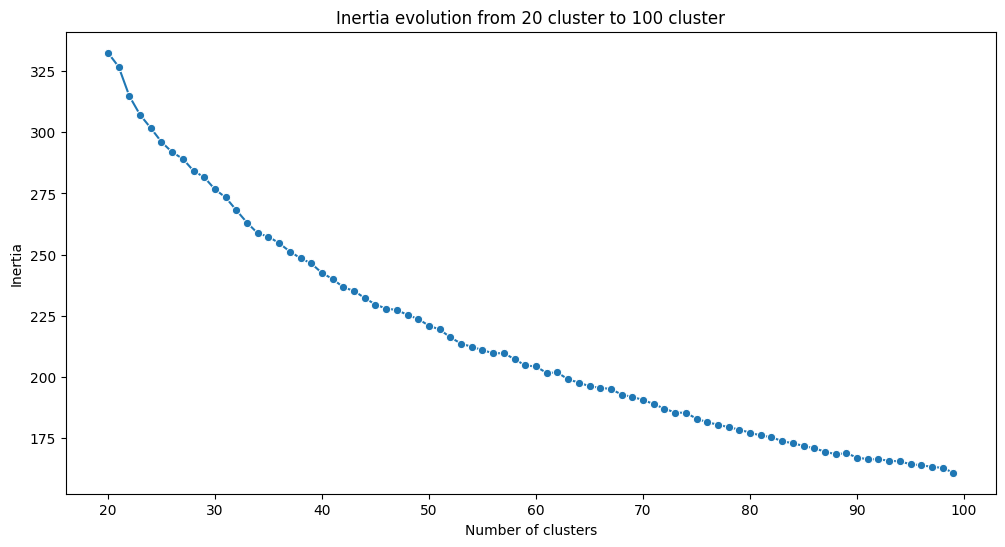

In [25]:
max_k = 100
inertia = []

for k in range(20, max_k):
    inertia.append(KMeans(n_clusters=k, n_init="auto", random_state=42).fit(songs_cl).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 20 cluster to {max_k} cluster')
sns.lineplot(x=range(20, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Silhouette Method

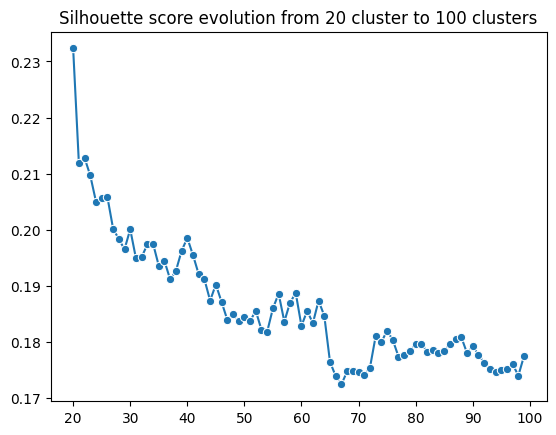

In [26]:
max_k = 100
sil_score = []

for k in range(20, max_k):
    labels = KMeans(n_clusters=k, n_init="auto", random_state=42).fit(songs_cl).labels_
    sil_score.append(silhouette_score(songs_cl, labels))

plt.title(f'Silhouette score evolution from 20 cluster to {max_k} clusters')
sns.lineplot(x=range(20, max_k), y=sil_score, marker='o')
plt.show()

# Calculating the Centroids

In [27]:
kmeans = KMeans(n_clusters=22, n_init="auto", random_state=42)
kmeans.fit(songs_cl)
kmeans.cluster_centers_
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = ["danceability", "energy", "acousticness", "instrumentalness", "liveness", "valence"]
centroids

,danceability,energy,acousticness,instrumentalness,liveness,valence
0,0.411749,0.105677,0.965038,0.883589,0.113773,0.187549
1,0.533880,0.564201,0.107661,0.013122,0.146916,0.241636
2,0.266858,0.883031,0.004704,0.846436,0.183529,0.367849
3,0.729091,0.817273,0.104066,0.010213,0.106873,0.823281
4,0.660284,0.676474,0.583899,0.017864,0.165191,0.825414
5,0.277089,0.943594,0.004104,0.062614,0.183081,0.179011
6,0.597439,0.331857,0.797929,0.039962,0.143797,0.572883
7,0.730852,0.688180,0.102712,0.008947,0.137326,0.533900
8,0.573768,0.512964,0.630518,0.006104,0.706446,0.611929
9,0.548869,0.838648,0.070449,0.017646,0.646803,0.416059


# Giving cluster numbers for our original data 

In [28]:
# giving the original data the cluster numbers
labeled_songs = songs_cl.copy()
labeled_songs["clusters"] = kmeans.labels_
labeled_songs.sample(30)

,danceability,energy,acousticness,instrumentalness,liveness,valence,clusters
221,0.696,0.2690,0.951000,0.026200,0.1100,0.7810,6
1607,0.825,0.8320,0.005870,0.000789,0.1140,0.7130,3
3249,0.846,0.9050,0.139000,0.000010,0.2280,0.8430,3
1981,0.501,0.0775,0.990000,0.950000,0.1180,0.1320,0
927,0.631,0.5870,0.536000,0.290000,0.3330,0.6640,4
2332,0.382,0.9960,0.002080,0.000000,0.4170,0.3270,5
1425,0.759,0.6990,0.202000,0.000131,0.4430,0.9070,16
5181,0.260,0.3680,0.817000,0.841000,0.1060,0.1910,20
3433,0.315,0.9810,0.000117,0.006850,0.6390,0.0597,9
2558,0.497,0.1530,0.978000,0.809000,0.1380,0.2760,0


In [29]:
#seeing how many songs there is in each cluster(playlist):
labeled_songs.groupby("clusters").size().reset_index(name='count')

,clusters,count
0,0,263
1,1,208
2,2,259
3,3,415
4,4,268
5,5,342
6,6,239
7,7,438
8,8,56
9,9,122


# Every thing in 1 code 

In [30]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.cluster import KMeans
# from math import pi
# from sklearn.metrics import pairwise_distances
# from sklearn.metrics import silhouette_score
# import os
# os.environ["OMP_NUM_THREADS"]="15"# this just form my computer 


# # getting the data 
# songs_df = pd.read_csv("df_audio_features_5000_cleaned_whitespaces.csv")


# # Calcualting the Corrolation between the tables 
# songs_df[["danceability", "energy", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "mode", "duration_ms", "key", "time_signature"]].corr()

# # comparing the varicanes 
# songs_df[["speechiness","danceability", "energy", "acousticness", "instrumentalness", "liveness", "valence"]].var()


# # Droping the unwanted features coz we need only numeric data for the next process
# songs_cl = songs_df.copy()
# songs_cl.drop(["name", "artist", "key", "mode", "type", "time_signature", "duration_ms", "id", "html", "tempo", "loudness", "speechiness"], axis=1, inplace=True)
# songs_cl


# # Chosing the right number of clusters
# ## Elbow method 
# max_k = 100
# inertia = []

# for k in range(20, max_k):
#     inertia.append(KMeans(n_clusters=k, n_init="auto", random_state=42).fit(songs_cl).inertia_)

# fig, ax = plt.subplots(figsize=(12, 6))
# plt.title(f'Inertia evolution from 20 cluster to {max_k} cluster')
# sns.lineplot(x=range(20, max_k), y=inertia, marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()


# ## Silhouette Method
# max_k = 100
# sil_score = []

# for k in range(20, max_k):
#     labels = KMeans(n_clusters=k, n_init="auto", random_state=42).fit(songs_cl).labels_
#     sil_score.append(silhouette_score(songs_cl, labels))

# plt.title(f'Silhouette score evolution from 20 cluster to {max_k} clusters')
# sns.lineplot(x=range(20, max_k), y=sil_score, marker='o')
# plt.show()



# # Calculating the Centroids
# kmeans = KMeans(n_clusters=33, n_init="auto", random_state=42)
# kmeans.fit(songs_cl)
# kmeans.cluster_centers_
# centroids = pd.DataFrame(kmeans.cluster_centers_)
# centroids.columns = ["danceability", "energy", "acousticness", "instrumentalness", "liveness", "valence"]
# centroids



# # Giving cluster numbers for our original data 
# labeled_songs = songs_df.copy()
# labeled_songs["clusters"] = kmeans.labels_
# labeled_songs.sample(30)


# #seeing how many songs there is in each cluster(playlist):
# labeled_songs.groupby("clusters")["energy"].count().to_frame()